In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
ndata = pd.read_csv("NextData.csv")

In [5]:
ndata.head()

,Advertiser,Advertiser ID,Advertiser Status,Advertiser Integration Code,Time of Day,Country,Device Type,Advertiser Currency,Impressions,Active View: Measurable Impressions,Active View: Viewable Impressions,Clicks,Revenue (Adv Currency)
0,Next_UK_Zenith,378754,Active,NaN,0.0,DE,Desktop,GBP,16033.0,15214.0,4048.0,3.0,15.064673
1,Next_UK_Zenith,378754,Active,NaN,0.0,HK,Desktop,GBP,24158.0,23581.0,9229.0,19.0,51.533391
2,Next_UK_Zenith,378754,Active,NaN,1.0,DE,Desktop,GBP,31903.0,30341.0,7678.0,6.0,25.592858
3,Next_UK_Zenith,378754,Active,NaN,1.0,GB,Desktop,GBP,94044.0,92256.0,57478.0,157.0,301.121433
4,Next_UK_Zenith,378754,Active,NaN,1.0,GB,Tablet,GBP,53025.0,48877.0,25243.0,49.0,125.552097


In [6]:
ndata = ndata.drop(ndata.index[336::])

In [7]:
ndata = ndata.drop(["Advertiser ID", "Advertiser Status", "Advertiser Integration Code"], axis=1)

In [8]:
ndata.tail()

,Advertiser,Time of Day,Country,Device Type,Advertiser Currency,Impressions,Active View: Measurable Impressions,Active View: Viewable Impressions,Clicks,Revenue (Adv Currency)
331,Next_UK_Zenith,8.0,AU,Desktop,GBP,54393.0,53375.0,24957.0,41.0,109.464148
332,Next_UK_Zenith,9.0,CZ,Desktop,GBP,11734.0,11593.0,5158.0,25.0,34.568392
333,Next_UK_Zenith,9.0,GB,Smart Phone,GBP,357093.0,333585.0,138886.0,1481.0,985.659847
334,Next_UK_Zenith,9.0,RU,Desktop,GBP,254583.0,251489.0,116124.0,251.0,383.502848
335,Next_UK_Zenith,9.0,SK,Desktop,GBP,82911.0,81246.0,33392.0,81.0,102.547073


In [9]:
ndata.columns

Index(['Advertiser', 'Time of Day', 'Country', 'Device Type',
       'Advertiser Currency', 'Impressions',
       'Active View: Measurable Impressions',
       'Active View: Viewable Impressions', 'Clicks',
       'Revenue (Adv Currency)'],
      dtype='object')

In [10]:
ndata.columns=['Advertiser', 'TOD', 'Country', 'DeviceType',
       'AdvertiserCurrency', 'Impressions',
       'MeasurableImpressions',
       'ViewableImpressions', 'Clicks',
       'Spend']

In [11]:
ndata.head()

,Advertiser,TOD,Country,DeviceType,AdvertiserCurrency,Impressions,MeasurableImpressions,ViewableImpressions,Clicks,Spend
0,Next_UK_Zenith,0.0,DE,Desktop,GBP,16033.0,15214.0,4048.0,3.0,15.064673
1,Next_UK_Zenith,0.0,HK,Desktop,GBP,24158.0,23581.0,9229.0,19.0,51.533391
2,Next_UK_Zenith,1.0,DE,Desktop,GBP,31903.0,30341.0,7678.0,6.0,25.592858
3,Next_UK_Zenith,1.0,GB,Desktop,GBP,94044.0,92256.0,57478.0,157.0,301.121433
4,Next_UK_Zenith,1.0,GB,Tablet,GBP,53025.0,48877.0,25243.0,49.0,125.552097


In [12]:
ndata["CTR"] = ndata.Clicks / ndata.Impressions
ndata["CPM"] = ndata.Spend / ndata.Impressions * 1000
ndata["Viewability"] = ndata.ViewableImpressions / ndata.MeasurableImpressions

In [13]:
ndata.Country = ndata.Country.astype("category")
ndata.DeviceType = ndata.DeviceType.astype("category")

In [14]:
ndata.head()

,Advertiser,TOD,Country,DeviceType,AdvertiserCurrency,Impressions,MeasurableImpressions,ViewableImpressions,Clicks,Spend,CTR,CPM,Viewability
0,Next_UK_Zenith,0.0,DE,Desktop,GBP,16033.0,15214.0,4048.0,3.0,15.064673,0.000187,0.939604,0.266071
1,Next_UK_Zenith,0.0,HK,Desktop,GBP,24158.0,23581.0,9229.0,19.0,51.533391,0.000786,2.133181,0.391374
2,Next_UK_Zenith,1.0,DE,Desktop,GBP,31903.0,30341.0,7678.0,6.0,25.592858,0.000188,0.802209,0.253057
3,Next_UK_Zenith,1.0,GB,Desktop,GBP,94044.0,92256.0,57478.0,157.0,301.121433,0.001669,3.201921,0.623027
4,Next_UK_Zenith,1.0,GB,Tablet,GBP,53025.0,48877.0,25243.0,49.0,125.552097,0.000924,2.367791,0.516460


---

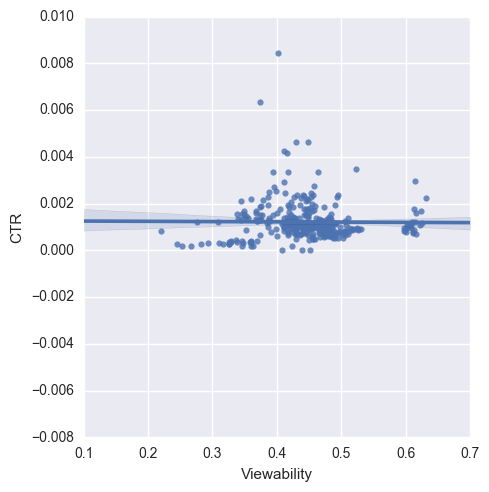

In [15]:
#below we explore below setting the axis
#first of all let's start with a plot
sns.lmplot(data=ndata, x="Viewability", y="CTR")

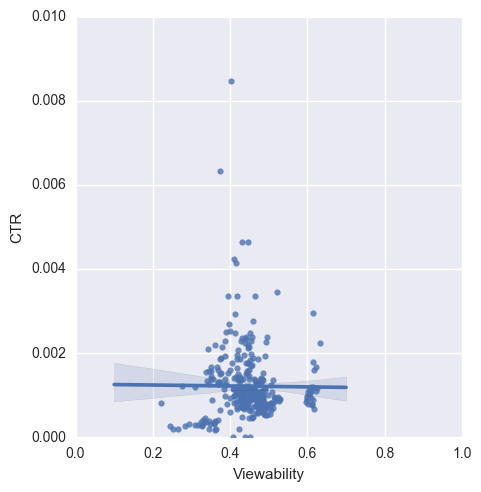

In [16]:
#firstly we can set x and y axis limits as below
#initially we need to name the plot then set customised axis values against this named plot
avivaplot = sns.lmplot(data=ndata, x="Viewability", y="CTR")
avivaplot = avivaplot.set(xlim=[0, 1], ylim=[0, 0.01])

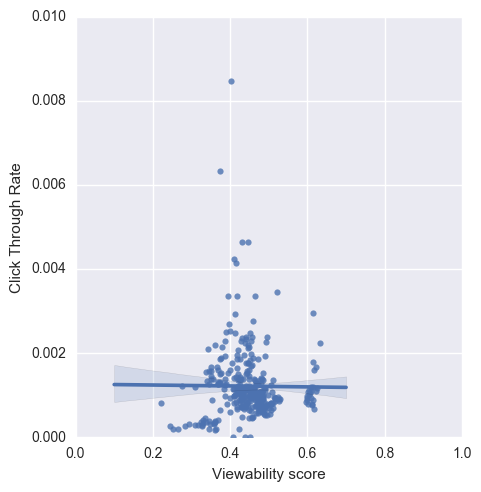

In [17]:
#we can then set labels in the same function using xlabel and ylabel
avivaplot = sns.lmplot(data=ndata, x="Viewability", y="CTR")
avivaplot = avivaplot.set(xlim=[0, 1], ylim=[0, 0.01], xlabel="Viewability score", ylabel="Click Through Rate")

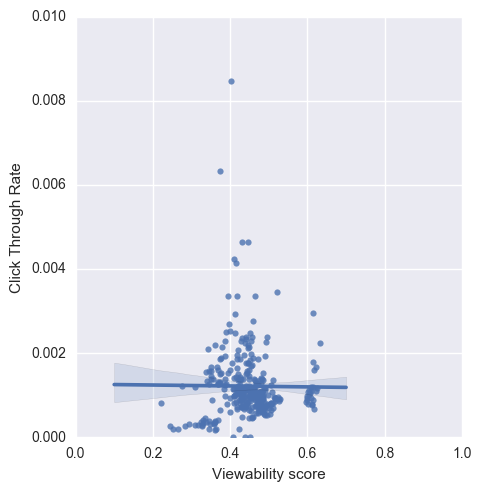

In [18]:
#same thing above can be done by using function as below 
avivaplot = sns.lmplot(data=ndata, x="Viewability", y="CTR")
avivaplot = avivaplot.set(xlim=[0, 1], ylim=[0, 0.01])
avivaplot = avivaplot.set_xlabels("Viewability score")
avivaplot = avivaplot.set_ylabels("Click Through Rate")

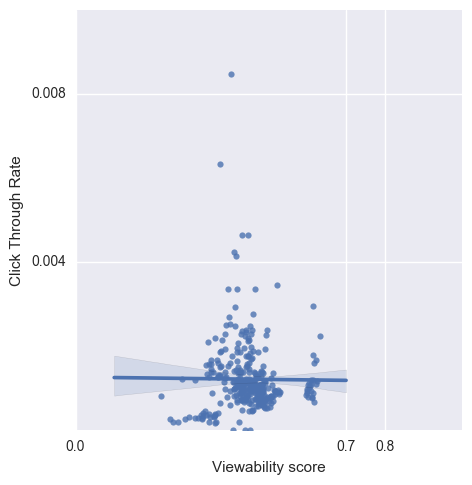

In [19]:
#we can then set ticks to our liking using xticks and yticks
avivaplot = sns.lmplot(data=ndata, x="Viewability", y="CTR")
avivaplot = avivaplot.set(xlim=[0, 1], ylim=[0, 0.01], xlabel="Viewability score", ylabel="Click Through Rate",
                         xticks=[0, 0.7, 0.8], yticks=[0.004, 0.008])

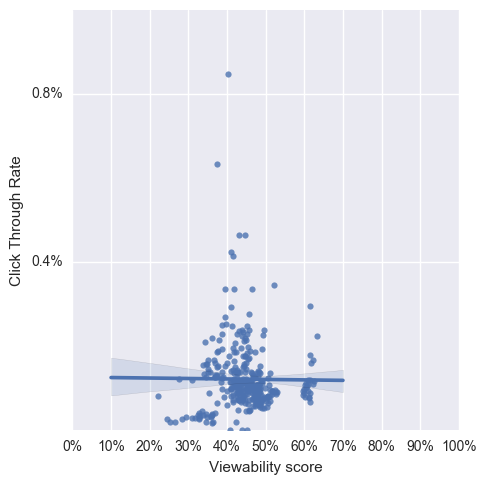

In [23]:
#further we can do the same for ticklabels using xticklabels and yticklabels
avivaplot = sns.lmplot(data=ndata, x="Viewability", y="CTR")
avivaplot = avivaplot.set(xlim=[0, 1], ylim=[0, 0.01], xlabel="Viewability score", ylabel="Click Through Rate",
                         xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], yticks=[0.004, 0.008], 
                          xticklabels=["0%", "10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%", "100%"], 
                         yticklabels=["0.4%", "0.8%"])

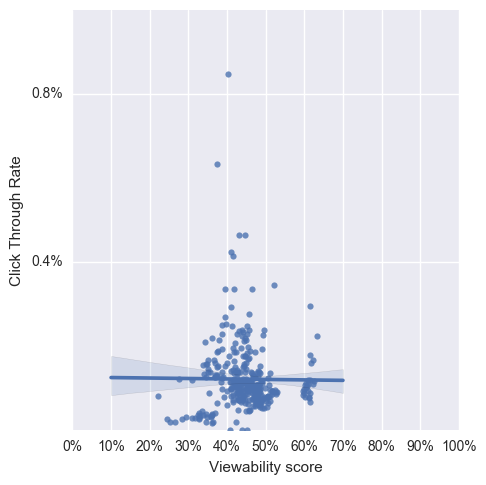

In [25]:
#again above can be achieved by the same thing different method
avivaplot = sns.lmplot(data=ndata, x="Viewability", y="CTR")
avivaplot = avivaplot.set(xlim=[0, 1], ylim=[0, 0.01], xlabel="Viewability score", ylabel="Click Through Rate",
                         xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], yticks=[0.004, 0.008])
avivaplot = avivaplot.set_xticklabels(["0%", "10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%", "100%"])
avivaplot = avivaplot.set_yticklabels(["0.4%", "0.8%"])

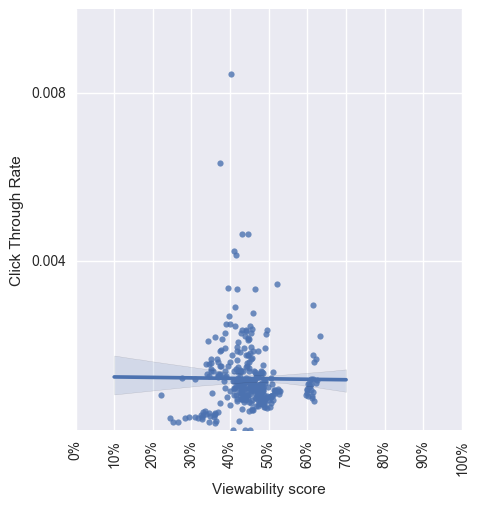

In [26]:
#to change the orientation of the ticklabels we use rotation 
avivaplot = sns.lmplot(data=ndata, x="Viewability", y="CTR")
avivaplot = avivaplot.set(xlim=[0, 1], ylim=[0, 0.01], xlabel="Viewability score", ylabel="Click Through Rate",
                         xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], yticks=[0.004, 0.008])
avivaplot = avivaplot.set_xticklabels(["0%", "10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%", "100%"],
                                     rotation=90)